In [1]:
#import libraries required for data analysis & modelling
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
from datetime import datetime

In [2]:
#import weather data
weather_data = pd.read_csv('weather_data.csv')
weather_data

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,30/08/2021,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


In [3]:
#find missing data from max temp column in weather data
missing_data = weather_data[weather_data['Maximum temperature (°C)'].isnull()]
print(missing_data)

          Date  Minimum temperature (°C)  Maximum temperature (°C)  \
188  8/07/2021                       NaN                       NaN   

     Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
188            NaN               1.8               8.3   

    Direction of maximum wind gust   Speed of maximum wind gust (km/h)  \
188                             NaN                                NaN   

    Time of maximum wind gust  9am Temperature (°C)  ...  \
188                       NaN                   NaN  ...   

     9am cloud amount (oktas)  9am wind direction 9am wind speed (km/h)  \
188                         2                 NaN                   NaN   

    9am MSL pressure (hPa)  3pm Temperature (°C)  3pm relative humidity (%)  \
188                    NaN                  12.0                         55   

     3pm cloud amount (oktas)  3pm wind direction 3pm wind speed (km/h)  \
188                       6.0                  NE                     9   

    3pm MSL

In [4]:
#Figure 3 - show row with missing max temp
weather_data.iloc[[188]]

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
188,8/07/2021,NaN,NaN,NaN,1.8,8.3,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,12.0,55,6.0,NE,9,1019.4


In [5]:
#replace empty Max temperature record with median max temp
x = weather_data["Maximum temperature (°C)"].median()
print(x)
weather_data["Maximum temperature (°C)"].fillna(x, inplace = True)
weather_data.iloc[[188]]

18.3


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
188,8/07/2021,NaN,18.3,NaN,1.8,8.3,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,12.0,55,6.0,NE,9,1019.4


In [6]:
#Create new variable - var of max temp for the day vs avg max temp (absolute)
weather_data['Var to avg max temp'] = round((weather_data['Maximum temperature (°C)']-\
                                      weather_data['Maximum temperature (°C)'].mean()).abs(),1)

#Convert date column to make date format consistent with price demand
weather_data['Date'] = pd.to_datetime(weather_data['Date'], dayfirst = True).dt.date
weather_data.sort_values('Date')
weather_data.tail()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Var to avg max temp
238,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4,5.8
239,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5,1.6
240,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,N,13,1011.4,12.8,84,7.0,S,6,1010.4,3.2
241,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2,1.8
242,2021-08-31,11.0,20.1,0.0,5.8,3.6,N,61.0,16:29,13.5,...,N,17,NaN,19.4,43,6.0,N,30,1012.2,0.7


In [7]:
#import price demand data
price_demand = pd.read_csv('price_demand_data.csv')
price_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW
...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM


In [8]:
#convert settlement date format to exclude time of the day
price_demand['DATE'] = pd.to_datetime(price_demand['SETTLEMENTDATE'],\
                       dayfirst = True).dt.date
price_demand.sort_values('DATE')
price_demand.tail()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,DATE
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31
11663,VIC1,1/09/2021 0:00,4811.27,MEDIUM,2021-09-01


In [9]:
#group totaldemand by the date to obtain daily total energy demand
demand_bydate = price_demand.groupby('DATE')['TOTALDEMAND']\
                .sum().reset_index(name='TOTALDEMAND')
demand_bydate.tail()

,DATE,TOTALDEMAND
239,2021-08-28,209104.93
240,2021-08-29,224449.35
241,2021-08-30,232158.40
242,2021-08-31,226540.29
243,2021-09-01,4811.27


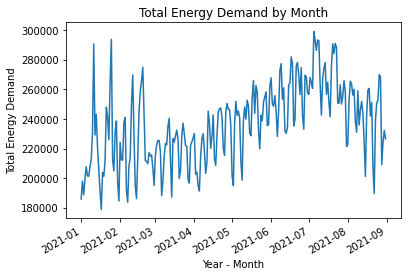

In [10]:
#Line chart showing demand movement from 1 Jan to 31 Aug 2021
plt.plot(weather_data['Date'],demand_bydate['TOTALDEMAND'].loc[0:242])
plt.title("Total Energy Demand by Month")
plt.gcf().autofmt_xdate()
plt.xlabel("Year - Month")
plt.ylabel("Total Energy Demand")
plt.show()

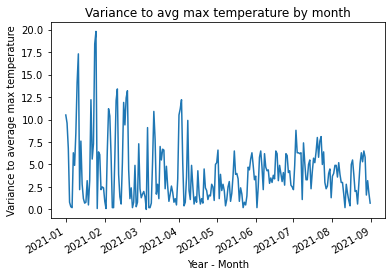

In [11]:
#Line chart showing var to max temperature movement from 1 Jan to 31 Aug 2021
plt.plot(weather_data['Date'],weather_data['Var to avg max temp'])
plt.title("Variance to avg max temperature by month")
plt.gcf().autofmt_xdate()
plt.xlabel("Year - Month")
plt.ylabel("Variance to average max temperature")
plt.show()

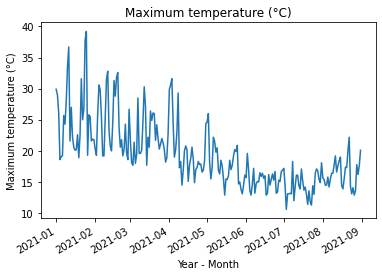

In [12]:
#Line chart showing max temperature movement from 1 Jan to 31 Aug 2021
plt.plot(weather_data['Date'],weather_data['Maximum temperature (°C)'])
plt.title("Maximum temperature (°C)")
plt.gcf().autofmt_xdate()
plt.xlabel("Year - Month")
plt.ylabel("Maximum temperature (°C)")
plt.show()

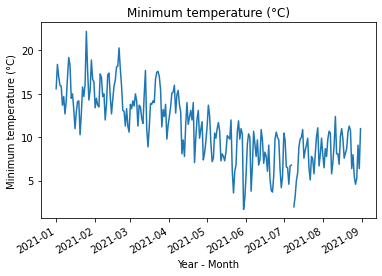

In [13]:
#Line chart showing min temperature movement from 1 Jan to 31 Aug 2021
plt.plot(weather_data['Date'],weather_data['Minimum temperature (°C)'])
plt.title("Minimum temperature (°C)")
plt.gcf().autofmt_xdate()
plt.xlabel("Year - Month")
plt.ylabel("Minimum temperature (°C)")
plt.show()

In [14]:
#Merge weather data with total demand data
merged_data = demand_bydate.join(weather_data.set_index('Date'), on='DATE')
merged_data.tail()

,DATE,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Var to avg max temp
239,2021-08-28,209104.93,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,N,7,1018.6,17.4,31.0,3.0,NNW,24,1013.5,1.6
240,2021-08-29,224449.35,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,N,13,1011.4,12.8,84.0,7.0,S,6,1010.4,3.2
241,2021-08-30,232158.40,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,...,N,15,1016.1,16.8,45.0,1.0,NNW,28,1013.2,1.8
242,2021-08-31,226540.29,11.0,20.1,0.0,5.8,3.6,N,61.0,16:29,...,N,17,NaN,19.4,43.0,6.0,N,30,1012.2,0.7
243,2021-09-01,4811.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Delete data dated 2021-09-01
merged_data.dropna(inplace = True)
merged_data.tail()

,DATE,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Var to avg max temp
237,2021-08-26,269865.57,5.5,12.9,1.2,2.4,1.0,SE,31.0,12:54,...,,Calm,1022.7,12.2,55.0,7.0,SSE,13,1020.3,6.5
238,2021-08-27,268490.26,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,...,,Calm,1020.0,12.8,65.0,7.0,SSE,7,1017.4,5.8
239,2021-08-28,209104.93,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,N,7,1018.6,17.4,31.0,3.0,NNW,24,1013.5,1.6
240,2021-08-29,224449.35,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,N,13,1011.4,12.8,84.0,7.0,S,6,1010.4,3.2
241,2021-08-30,232158.40,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,...,N,15,1016.1,16.8,45.0,1.0,NNW,28,1013.2,1.8


In [16]:
#Correlation matrix of other variables against Total Demand
corr_matrix = merged_data.corr()
corr_matrix['TOTALDEMAND'].sort_values(ascending=False)

TOTALDEMAND                          1.000000
Var to avg max temp                  0.331182
3pm relative humidity (%)            0.193581
3pm cloud amount (oktas)             0.178054
9am relative humidity (%)            0.165704
Speed of maximum wind gust (km/h)    0.087306
9am cloud amount (oktas)             0.002012
9am MSL pressure (hPa)              -0.016107
3pm MSL pressure (hPa)              -0.053578
Rainfall (mm)                       -0.060332
Evaporation (mm)                    -0.275611
Sunshine (hours)                    -0.308669
Maximum temperature (°C)            -0.350654
3pm Temperature (°C)                -0.369452
9am Temperature (°C)                -0.390008
Minimum temperature (°C)            -0.461478
Name: TOTALDEMAND, dtype: float64

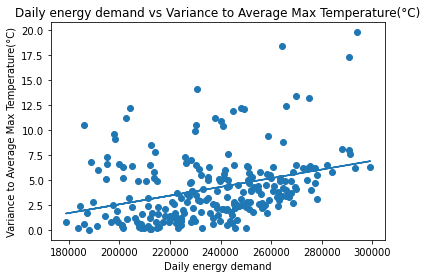

In [17]:
#Print scatter plot of Total Demand vs Var to Avg Max Temp
plt.scatter(merged_data['TOTALDEMAND'],merged_data['Var to avg max temp'])
plt.title("Daily energy demand vs Variance to Average Max Temperature(°C)")
plt.xlabel("Daily energy demand")
plt.ylabel("Variance to Average Max Temperature(°C)")
z = np.polyfit(merged_data['TOTALDEMAND'], merged_data['Var to avg max temp'], 1)
p = np.poly1d(z)
plt.plot(merged_data['TOTALDEMAND'], p(merged_data['TOTALDEMAND']))


In [18]:
#Print pearson coefficient for chosen variable
print("Pearson r is ",merged_data['TOTALDEMAND'].corr(merged_data['Var to avg max temp']))

Pearson r is  0.3311817825385045


In [19]:
#Regression model 1 - Predict Daily Total Energy Usages Based on Var to Avg Max temp
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X = np.array(merged_data['Var to avg max temp']).reshape((-1, 1))
y = np.array(merged_data['TOTALDEMAND'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Test model - 16th var to avg max temp (model output)
model.predict(X_train)[15]

240407.48740511845

In [24]:
##Test model - 16th var to avg max temp (actual)
y_train[15]

251081.75

In [25]:
#Test model - r2 score for model 1
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(r2_train)
print(r2_test)

0.11976306197162867
0.06611755393700236


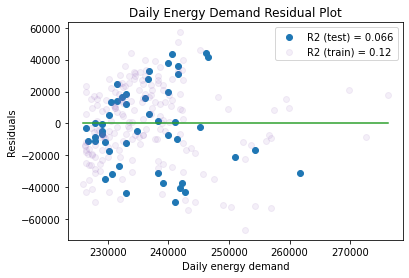

In [26]:
#Test model - Perform residual analysis on mode 1
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.scatter(y_test_pred, test_residuals, color="C0", 
            label="R2 (test) = {:.2}".format(r2_test))
plt.scatter(y_train_pred, train_residuals, color="C4", 
            label="R2 (train) = {:.2}".format(r2_train),
           alpha=0.1)
plt.plot([y_train_pred.min(), y_train_pred.max()], [0,0], color ="C2")
plt.title("Daily Energy Demand Residual Plot")
plt.xlabel("Daily energy demand")
plt.ylabel("Residuals")
plt.legend()
plt.show()

In [27]:
#Merged data - sort by total demand in descending order
merged_data.sort_values('TOTALDEMAND',ascending=False)

,DATE,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Var to avg max temp
185,2021-07-05,299108.95,4.6,13.1,0.4,1.6,1.9,SSW,22.0,12:47,...,NE,9,1022.7,12.7,66.0,7.0,SW,7,1021.5,6.3
24,2021-01-25,293732.59,22.2,39.2,0.0,13.8,3.5,W,54.0,15:37,...,N,13,1001.3,26.6,47.0,7.0,WSW,11,999.6,19.8
186,2021-07-06,293042.97,6.7,13.2,0.0,1.0,0.6,NW,20.0,3:16,...,N,9,1023.4,12.9,55.0,7.0,NNW,11,1022.2,6.2
202,2021-07-22,291066.68,5.1,11.8,0.6,2.6,0.1,NNW,46.0,14:11,...,N,17,1015.8,10.5,66.0,7.0,N,22,1010.7,7.6
200,2021-07-20,290673.41,9.9,11.4,0.6,2.2,0.3,SW,54.0,17:18,...,N,13,1005.2,8.6,86.0,8.0,SSW,13,1007.4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2021-02-14,186121.40,12.7,20.0,0.0,4.0,8.1,SSW,35.0,13:52,...,SE,9,1019.5,19.3,58.0,6.0,SSW,19,1019.3,0.6
0,2021-01-01,185853.37,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,...,N,2,1018.8,28.1,43.0,5.0,E,13,1015.3,10.5
30,2021-01-31,184446.81,16.4,21.8,0.0,4.0,10.3,S,39.0,16:39,...,SE,13,1018.6,19.9,55.0,1.0,SSW,19,1017.2,2.4
37,2021-02-07,183730.61,14.7,19.2,1.8,5.6,2.0,SSW,37.0,11:23,...,W,7,1011.5,17.4,69.0,7.0,S,17,1013.7,0.2
